In [36]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [37]:
df = pd.read_csv('placement2.csv')
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [38]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
X = df.iloc[:,0:1]
y = df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

In [39]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

Text(0, 0.5, 'Package(in lpa)')

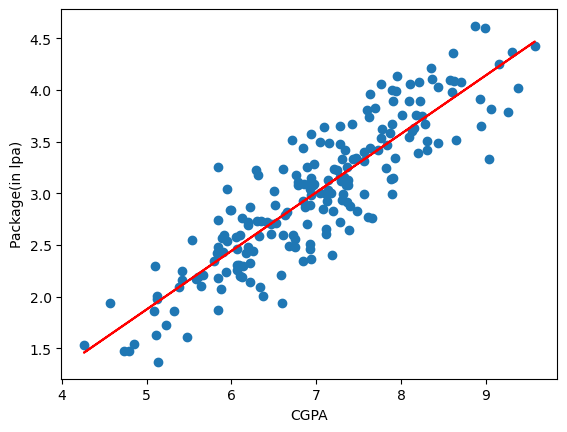

In [40]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_train,lr.predict(X_train),color='red')
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [41]:
y_pred = lr.predict(X_test)
print("MAE",mean_absolute_error(y_test,y_pred)) # result in lpa
print("MSE",mean_squared_error(y_test,y_pred)) # result not in pla
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred))) # result in lpa
print("R2_score",r2_score(y_test,y_pred)) # 
r2 = r2_score(y_test,y_pred)
Adjusted_R2_score = 1 - ((1-r2)*(40-1)/(40-1-1))
print("Adjusted R2 Score", Adjusted_R2_score)

MAE 0.2292560996078727
MSE 0.07981193609450979
RMSE 0.2825100637048347
R2_score 0.806271834014574
Adjusted R2 Score 0.8011737243833786


In [42]:
df.shape

(200, 2)

In [43]:
# Let's check after adding an irrelevant column:
new_df1 = df.copy()
new_df1['random'] = np.random.random(200)

new_df1 = new_df1[['cgpa','random','package']]
new_df1.head()

,cgpa,random,package
0,6.89,0.735602,3.26
1,5.12,0.314968,1.98
2,7.82,0.051511,3.25
3,7.42,0.731830,3.67
4,6.94,0.250458,3.57


In [44]:
X1 = new_df1.iloc[:,0:2]
y1 = new_df1.iloc[:,-1]
X_train1,X_test1,y_train1,y_test1 = train_test_split(X1,y1,test_size=0.2)
lr = LinearRegression()
lr.fit(X_train1,y_train1)
y_pred1 = lr.predict(X_test1)

In [45]:
print("R2_score",r2_score(y_test1,y_pred1)) 
r_2 = r2_score(y_test1,y_pred1)
Adjusted_R_2_score = 1 - ((1-r_2)*(40-1)/(40-1-2))
print("Adjusted R2 Score", Adjusted_R_2_score)

R2_score 0.7973529348054968
Adjusted R2 Score 0.7863990393895778
